# Product Matching -- EDA


### Key goals:
 - Explore the STSB datasets
   ref: https://huggingface.co/datasets/sentence-transformers/stsb
#### Dataset Card for STSB

The Semantic Textual Similarity Benchmark (Cer et al., 2017) is a collection of sentence pairs drawn from news headlines, video and image captions, and natural language inference data. Each pair is human-annotated with a similarity score from 1 to 5. However, for this variant, the similarity scores are normalized to between 0 and 1.

Dataset Details
Columns: "sentence1", "sentence2", "score"
Column types: str, str, float

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../datasets/stsb/stsb_train',)
catalog_a, catalog_b, score = list(df['sentence1']), list(df['sentence2']), list(df['score'])

number_of_rows = 10
catalog_a = catalog_a[:number_of_rows]
catalog_b = catalog_b[:number_of_rows]
score = score[:number_of_rows]

In [4]:
df.head(10)

,sentence1,sentence2,score
0,A plane is taking off.,An air plane is taking off.,1.00
1,A man is playing a large flute.,A man is playing a flute.,0.76
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.76
3,Three men are playing chess.,Two men are playing chess.,0.52
4,A man is playing the cello.,A man seated is playing the cello.,0.85
5,Some men are fighting.,Two men are fighting.,0.85
6,A man is smoking.,A man is skating.,0.10
7,The man is playing the piano.,The man is playing the guitar.,0.32
8,A man is playing on a guitar and singing.,A woman is playing an acoustic guitar and sing...,0.44
9,A person is throwing a cat on to the ceiling.,A person throws a cat on the ceiling.,1.00


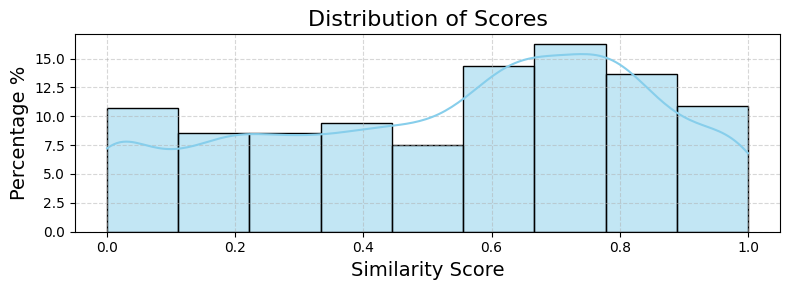

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
sns.histplot(df['score'], bins=9, kde=True, stat='percent',
             color='skyblue', edgecolor='black', cumulative=False)

plt.title('Distribution of Scores', fontsize=16)
plt.xlabel('Similarity Score', fontsize=14)
plt.ylabel('Percentage %', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [9]:
df[df['score']<0.1].head(10)

,sentence1,sentence2,score
120,A woman is dancing.,A man is eating.,0.03
141,A woman is dancing.,A man is talking.,0.00
143,A man is rowing a boat.,A man is slicing a tomato.,0.08
169,A woman is sitting at a desk.,A woman is riding a donkey.,0.08
188,A man is playing a guitar.,A man is cleaning a glass door.,0.08
200,Someone is feeding a animal.,Someone is playing a piano.,0.00
201,Someone is slicing tortila's.,Someone is riding a horse.,0.00
202,Someone is mixing ingrediants.,Someone is sewing things.,0.05
209,A man is mowing a lawn.,A woman is cutting a lemon.,0.04
213,A man is punching through boards.,A dog is running through water.,0.08


In [10]:
df[df['score']>0.9].head(10)

,sentence1,sentence2,score
0,A plane is taking off.,An air plane is taking off.,1.00
9,A person is throwing a cat on to the ceiling.,A person throws a cat on the ceiling.,1.00
11,A woman picks up and holds a baby kangaroo.,A woman picks up and holds a baby kangaroo in ...,0.92
13,A person is folding a piece of paper.,Someone is folding a piece of paper.,0.93
16,The polar bear is sliding on the snow.,A polar bear is sliding across the snow.,1.00
19,The man is riding a horse.,A man is riding on a horse.,1.00
22,A panda is sliding down a slide.,A panda slides down a slide.,0.92
24,A woman peels a potato.,A woman is peeling a potato.,1.00
25,The boy fell off his bike.,A boy falls off his bike.,0.96
26,The woman is playing the flute.,A woman is playing a flute.,1.00
